In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

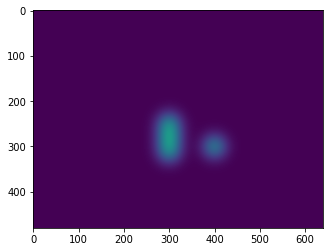

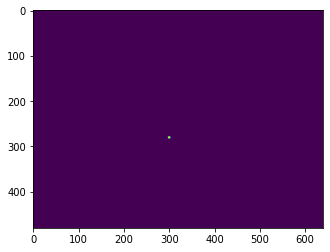

In [2]:
from skimage import filters

def mixgauss(Ideltas, sigma):
    '''Returns normed mixture of gaussians centered at delta locations'''
    G = (2*np.pi*sigma*sigma)*filters.gaussian(Ideltas, sigma)
    return np.clip(G, 0, 1)


def generate_heatmap(coords):
    heatmap = np.zeros((480, 640))
    
    for r, c in coords:
        heatmap[r, c] = 1
    
    heatmap = mixgauss(heatmap, sigma=20)
    
    return heatmap

h1 = generate_heatmap([[280, 300]])
h2 = generate_heatmap([[250, 300], [300, 400]])
h3 = generate_heatmap([[310, 300]])

h = 0.33*h1 + 0.33*h2 + 0.33*h3

plt.imshow(h, vmin=0, vmax=1)
plt.show()

from skimage import morphology

Imaxima = morphology.h_maxima(h, 0.4)

plt.imshow( morphology.dilation(Imaxima, selem=morphology.square(5)) )
plt.show()

0.8783365715052409


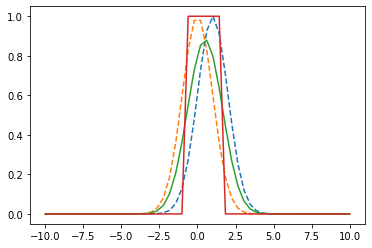

In [3]:
def gaussian(x, mu, sigma):
    return np.exp(-0.5*np.square((x - mu)/sigma))

x = np.linspace(-10, 10)

g1 = gaussian(x, 1, 1)
g2 = gaussian(x, 0, 1)

g = 0.5*g1 + 0.5*g2

plt.plot(x, g1, '--')
plt.plot(x, g2, '--')
plt.plot(x, g)
plt.plot(x, g > 0.5)

print(g.max())

plt.show()

0.5


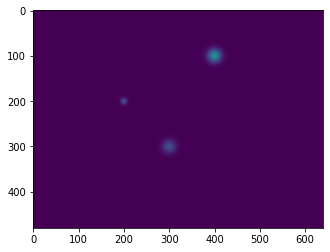

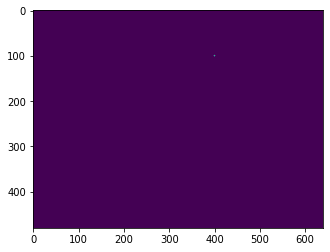

In [4]:
import sys
sys.path.append('../')
from heatmap import Heatmap

h1 = Heatmap(sigma=5).from_coords([[200, 200]])
h2 = Heatmap(sigma=10).from_coords([[300, 300]])
h3 = Heatmap(sigma=10).from_coords([[100, 400]])
h4 = Heatmap(sigma=10).from_coords([[100, 400]])

# Two out of four vote for (100, 400)
h = 0.25*h1 + 0.25*h2 + 0.25*h3 + 0.25*h4

print(h.max())

plt.imshow(h, vmin=0, vmax=1)
plt.show()

plt.imshow(morphology.dilation(morphology.h_maxima(h, 0.49)))
plt.show()

In [5]:
# h = Heatmap(sigma=10).from_coords()

def mixgauss(Ideltas, sigma):
    '''Returns normed mixture of gaussians centered at delta locations'''
    G = (2*np.pi*sigma*sigma)*filters.gaussian(Ideltas, sigma)
    return np.clip(G, 0, 1)


coords = [[100, 400], [101, 401], [99, 399]]

Idelta = np.zeros((480, 640))
for r, c in coords:
    Idelta[r, c] = 1

G = mixgauss(Idelta, 10)

print(G.max())

1.0


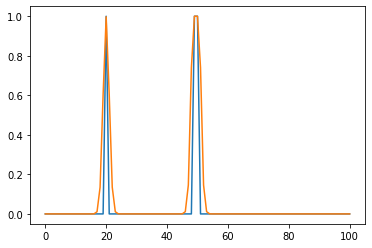

In [6]:
# In 1D
x = np.zeros((101,))
x[50] = 1
x[49] = 1 # should clip to 1
x[20] = 1 # this should be 1

delta = np.zeros((101,))
delta[50] = 1


y = np.clip(1./0.4*filters.gaussian(x), 0, 1)

plt.plot(x)
plt.plot(y)
plt.show()

0.01768488749356488
0.01768388256576615


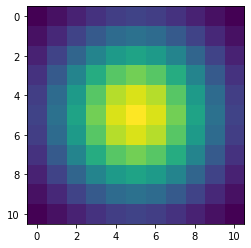

In [7]:
from scipy.signal import unit_impulse

sigma=3

delta2D = unit_impulse((11, 11), idx='mid')
G = filters.gaussian(delta2D, sigma=sigma)
Gmax = G.max()

print(Gmax)
print( 1./(2*np.pi*sigma*sigma) )

plt.imshow(delta2D)
plt.imshow(G)
plt.show()

1.0


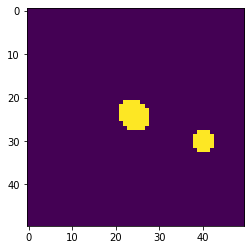

In [16]:
delta2D = unit_impulse((50, 50), idx=(25, 25))
delta2D += unit_impulse((50, 50), idx=(23, 23))
delta2D += unit_impulse((50, 50), idx=(30, 40))

h = mixgauss(delta2D, sigma=2)

print(h.max())

plt.imshow(h > 0.5)
plt.show()

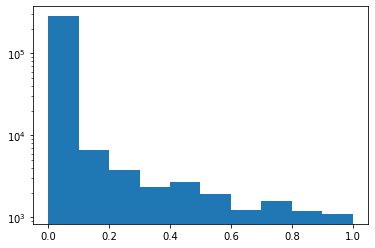

In [26]:
I = np.zeros((480, 640))
I[np.unravel_index(np.random.choice(I.size, size=100), I.shape)] = 1

h = Heatmap(sigma=4).from_delta(I)

plt.hist(h.ravel(), log=True)
plt.show()